In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
link = "https://raw.githubusercontent.com/Wild-Satellite/Datathon/main/CSV/UCS.csv"
link2 = "https://raw.githubusercontent.com/Wild-Satellite/Datathon/main/CSV/DiscoSat.csv"


In [4]:
UCS = pd.read_csv(link , index_col=0)
DiscoSat = pd.read_csv(link2 , index_col=0)

In [5]:
UCS.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'],
      dtype='object')

In [6]:
DiscoSat.columns

Index(['JCAT', 'Satcat', 'Piece', 'Type', 'Name', 'LDate', 'Parent', 'SDate',
       'Primary', 'DDate', 'Status', 'Owner', 'State', 'Manufacturer', 'Bus',
       'Motor', 'Mass', 'x', 'DryMass', 'x.1', 'TotMass', 'x.2', 'Length',
       'Diamete', 'Span', 'Shape', 'ODate', 'Perigee', 'Apogee', 'Inc',
       'OpOrbit', 'OQU', 'satno', 'id', 'name', 'cospar id', 'object class',
       'mass(kg)', 'shape', 'length(m)', 'height(m)', 'depth(m)',
       're-entry epoch', 'max cross section (m2)', 'min cross section (m2)',
       'avg cross section (m2)'],
      dtype='object')

In [7]:
UCS.head(2)

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT,NR (12/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,566,576,0.00072,36.9,96.08,22.0,NaN,NaN,2019-12-11,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...
1,3Cat-1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,476,500,0.00175,97.4,95.00,4.0,NaN,NaN,2018-11-29,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.


In [8]:
DiscoSat.head(2)

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2)
0,S00102,102.0,1961 LAM 2,PX-R---,SRV 521,1961 Apr 8,S00100,1961 Apr 10 1956?,Earth,1962-05-23 00:00:00,R,AFSSD/CIA,US,GERSD,SRV Mk V,Star 12,157.0,NaN,157.0,NaN,190.0,NaN,0.8,0.7,0.8,Cone,1961 May 11,202,1416,81.94,LEO/I,-,102.0,102.0,Capsule (00102),1961-011B,Payload,148.66,Cone,0.9,0.6,0.9,23/05/1962,0.636200,0.270000,0.424100
1,S00103,103.0,1961 MU 1,PH H,Vostok,1961 Apr 12,S00104,1961 Apr 12 0618,Earth,1961-04-12 07:47:00,L,OKB1,SU,OKB1,Vostok,-,2125.0,NaN,2125.0,NaN,4725.0,NaN,6.5,? 2.4 ?,6.5,? Sphere + DCone,1961 Apr 12,168,314,64.95,LLEO/I,-,103.0,103.0,Vostok 1,1961-012A,Payload,4682.85,Sphere + Cyl,2.4,4.3,4.3,12/04/1961,11.268008,4.523893,10.367256


In [9]:
df = pd.merge(DiscoSat, UCS, how='left', left_on='cospar id', right_on='COSPAR Number')

In [10]:
df.tail()

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
18067,S47852,47852.0,2021-019B,R3,CZ-7A Y2 Stage 3,2021 Mar 11,R80285,2021 Mar 11 1802,Earth,NaN,O,CASC,CN,CALT,CZ-3A Stage 3,-,8400.0,?,2800.0,?,2800.0,?,12.4,3.0,12.4,Cyl,2021 Mar 19,146,34384,19.55,GTO,-,47852.0,66362.0,H-18 (Long March (CZ) YF) (Long March (CZ) 7A),2021-019B,Rocket Body,2800.0,Cyl + 1 Nozzle,3.0,12.83,12.83,NaN,39.133681,7.068583,33.764267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18068,S47858,47858.0,2021-020E,R3,CZ-4C Y42 Stage 3,2021 Mar 13,R80288,2021 Mar 13 0231?,Earth,NaN,O,CNSA,CN,SAST,CZ-4 Stage 3,-,1000.0,?,1000.0,?,1000.0,?,7.5,2.9,7.5,Cyl,2021 Mar 14,1090,1097,63.41,LEO/I,-,47858.0,66379.0,L-14B-res (YF40B-res) (Long March (CZ) 4C),2021-020E,Rocket Body,1000.0,Cyl,2.9,1.92,2.90,NaN,8.638939,5.568000,7.675696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18069,S48080,48080.0,2021-026B,R3,CZ-4C Y36 Stage 3,2021 Mar 30,R80309,2021 Mar 30 2255?,Earth,NaN,O,CNSA,CN,SAST,CZ-4 Stage 3,-,1000.0,?,1000.0,?,0.0,?,7.5,2.9,7.5,Cyl,2021 Mar 31,525,599,97.82,LLEO/S,-,48080.0,66696.0,L-14B-res (YF40B-res) (Long March (CZ) 4C),2021-026B,Rocket Body,1000.0,Cyl,2.9,1.92,2.90,NaN,8.638939,5.568000,7.675696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18070,S47782,47782.0,2021-017BN,R2----,Falcon 9-110 Stage 2,2021 Mar 4,R80272,2021 Mar 4 0833,Earth,2021-03-26 04:00:00,R,SPX,US,SPX,F9St2,-,3000.0,?,3000.0,?,3000.0,?,7.0,? 3.6,7.0,Cyl,2021 Mar 6,281,282,53.00,LLEO/I,-,47782.0,66738.0,Falcon 9 Merlin-V (1D+) (Falcon 9 v1.2),2021-017BN,Rocket Body,4300.0,Cyl,3.6,16.00,16.00,26/03/2021,58.492454,10.178760,50.328314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18071,S47965,47965.0,2021-023A,P,Veery Hatchling v0.2,2021 Mar 22,A09728,2021 Mar 22 2324,Earth,NaN,O,CAREWX,US,CAREWX/BYU,Cubesat 1U,-,1.0,NaN,1.0,NaN,1.0,NaN,0.1,0.1,0.1,Box,2021 Mar 23,538,558,45.00,LLEO/I,-,47965.0,66814.0,Electron second stage (Electron (Curie)),2021-023A,Rocket Body,250.0,Cyl,1.2,2.40,1.20,NaN,3.094107,1.130973,2.827433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18072 entries, 0 to 18071
Data columns (total 74 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JCAT                                17923 non-null  object 
 1   Satcat                              17923 non-null  float64
 2   Piece                               17923 non-null  object 
 3   Type                                17923 non-null  object 
 4   Name                                17923 non-null  object 
 5   LDate                               17923 non-null  object 
 6   Parent                              17923 non-null  object 
 7   SDate                               17923 non-null  object 
 8   Primary                             17923 non-null  object 
 9   DDate                               7984 non-null   object 
 10  Status                              17923 non-null  object 
 11  Owner                               17923

# Nettoyage

In [12]:
dfna = df[~df['Date of Launch'].isna()]

In [13]:
dfna.head(10)

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
3241,S07530,7530.0,1974-089B,P,AMSAT-OSCAR-7,1974 Nov 15,S07532,1974 Nov 15 1828,Earth,NaN,O,AMNA,US,AMNA,AMSAT Phase 2,-,29.0,NaN,29.0,NaN,29.0,NaN,0.4,0.4,0.4,Oct Cyl,1974 Dec 19,1440,1461,101.73,LEO/S,-,7530.0,7528.0,OSCAR 7,1974-089B,Payload,28.74,Cyl,0.42,0.43,0.43,NaN,0.227620,0.138544,0.211115,Amsat-Oscar 7 (AO-7),Amsat-Oscar 7,USA,USA,AMSAT-NA,Civil,Communications,NaN,LEO,Polar,0.00,1440.0,1459.0,0.001215,101.40,114.90,29.0,NaN,NaN,1974-11-15,NaN,Amsat-NA,USA,Vandenberg AFB,Delta 2310,1974-089B,7530.0,American amateur radio satellite.
8073,S19548,19548.0,1988-091B,P ---S-,TDRS 3,1988 Sep 29,S19550,1988 Sep 29 0444,Earth,NaN,O,GSFC,US,TRW,TDRS,AOCS,2103.0,NaN,1673.0,?,2103.0,NaN,1.3,2.4,17.4,Box + Dish + 2 Pan,1988 Oct 30,35784,35797,0.01,GEO/S,-,19548.0,19545.0,TDRS 3,1988-091B,Payload,2247.77,Hex Cyl + 2 Pan,2.00,5.99,17.40,NaN,33.671884,2.701999,13.873415,"TDRS-3 (Tracking and Data Relay Satellite, TDR...",TDRS-3,USA,USA,National Aeronautics and Space Administration ...,Government,Communications,NaN,GEO,NaN,84.41,35693.0,35878.0,0.002194,11.53,1436.06,3180.0,1600,1800,1988-09-29,10.0,TRW Defense and Space Systems Group,USA,Cape Canaveral,Space Shuttle (STS 26),1988-091B,19548.0,Backup; still partially operational.
8422,S20253,20253.0,1989-077A,P,FLTSATCOM F8,1989 Sep 25,S20254,1989 Sep 25 0923,Earth,NaN,O,SPAWAR,US,TRW,FLTSATCOM,Star 37FM,957.0,NaN,822.0,NaN,1928.0,NaN,1.3,2.4,13.2,Hex Cyl + Dish + 2 Pan,1989 Oct 25,35781,35786,4.98,GEO/I,-,20253.0,20250.0,USA 46 (FLTSATCOM F8),1989-077A,Payload,1928.00,Hex Cyl + 1 Dish + 2 Pan,2.40,1.30,13.20,NaN,25.607785,2.701999,11.171415,FLTSATCOM-8 (USA 46),USA 46,USA,USA,US Navy,Military,Communications,NaN,GEO,NaN,-14.74,35745.0,35829.0,0.000996,8.97,1436.13,2310.0,1884,NaN,1989-09-25,5.0,"TRW, Defense and Space Systems Group",USA,Cape Canaveral,Atlas Centaur,1989-077A,20253.0,Old system replaced by UFO satellites; this sa...
8663,S20580,20580.0,1990-037B,P ---S-,Hubble Space Telescope,1990 Apr 24,S20579 2-11,1990 Apr 25 1249?,Earth,NaN,ATT,GSFC,US,LMSC,HST,-,7547.0,NaN,7547.0,NaN,10843.0,NaN,13.1,4.3,13.1,Step Cyl + 2 Pan,1990 May 24,611,620,28.47,LEO/I,-,20580.0,20577.0,Hubble Space Telescope,1990-037B,Payload,11258.67,Cyl + 2 Pan,4.30,13.29,13.29,NaN,58.171795,14.522012,51.502485,"Hubble Space Telescope (HST, Space Telescope)",Hubble Space Telescope,USA,ESA/USA,European Space Agency (ESA)/NASA,Government,Space Science,NaN,LEO,Non-Polar Inclined,0.00,555.0,559.0,0.000289,28.50,95.80,11110.0,NaN,2400,1990-04-25,10.0,European Space Agency/NASA,International,Cape Canaveral,Space Shuttle (STS 31),1990-037B,20580.0,Exploration of space.
8787,S20776,20776.0,1990-079A,P,Skynet 4C,1990 Aug 30,S20778,1990 Aug 30 2306,Earth,2003-10-24 00:00:00,N,MOD,UK,BAES,ECS,TE-M-700-19,1430.0,NaN,655.0,NaN,1430.0,NaN,2.1,1.9,16.0,Box + 2 Pan,1990 Sep 30,35785,35787,4.31,GEO/I,-,20776.0,20773.0,Skynet 4C,1990-079A,Payload,782.95,Hex Poly + 2 Pan,1.40,1.90,2.10,NaN,5.026143,1.539380,3.049501,Skynet 4C,Skynet 4C,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Military,Communications,NaN,GEO,NaN,-1.30,35775.0,35797.0,0.000261,13.60,1436

In [14]:
df['Unused'] = np.where(df['Users'].isna(), True, False)

In [15]:
df.head()

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unused
0,S00102,102.0,1961 LAM 2,PX-R---,SRV 521,1961 Apr 8,S00100,1961 Apr 10 1956?,Earth,1962-05-23 00:00:00,R,AFSSD/CIA,US,GERSD,SRV Mk V,Star 12,157.0,NaN,157.0,NaN,190.0,NaN,0.8,0.7,0.8,Cone,1961 May 11,202,1416,81.94,LEO/I,-,102.0,102.0,Capsule (00102),1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,23/05/1962,0.636200,0.270000,0.424100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,S00103,103.0,1961 MU 1,PH H,Vostok,1961 Apr 12,S00104,1961 Apr 12 0618,Earth,1961-04-12 07:47:00,L,OKB1,SU,OKB1,Vostok,-,2125.0,NaN,2125.0,NaN,4725.0,NaN,6.5,? 2.4 ?,6.5,? Sphere + DCone,1961 Apr 12,168,314,64.95,LLEO/I,-,103.0,103.0,Vostok 1,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,12/04/1961,11.268008,4.523893,10.367256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,S00104,104.0,1961 MU 2,R3,8K72KE,1961 Apr 12,R04680,1961 Apr 12 0618,Earth,1961-04-16 00:00:00,R,RVSN,SU,PROG,Blok-E,-,1440.0,NaN,1440.0,NaN,1440.0,NaN,3.8,2.6,3.8,Cyl,1961 Apr 14,154,267,65.07,LLEO/I,-,104.0,104.0,Vostok 8A92M-2 (Vostok SL-3 (A-1)),1961-012B,Rocket Body,1427.16,Cyl,2.60,3.80,3.80,16/04/1961,11.216193,5.309292,10.414380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,S00107,107.0,1961 NU 1,P A,Explorer 11,1961 Apr 27,A00095,1961 Apr 27 1425,Earth,NaN,AO,GSFC,US,MSFC,S-15,-,40.0,NaN,40.0,NaN,45.0,NaN,1.1,0.3,1.1,Step Cyl,1961 May 29,497,1777,28.76,LEO/I,-,107.0,107.0,Explorer 11,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaN,0.337486,0.070686,0.294524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,S00108,108.0,1961 XI 1,P A,Discoverer 25,1961 Jun 16,A00096,1961 Jun 16 2309,Earth,1961-07-12 00:00:00,AR,AFSSD/CIA,US,LMSC,CORONA,-,134.0,NaN,134.0,NaN,1114.0,NaN,1.3,1.5,1.3,Frust,1961 Jun 24,223,362,82.11,LLEO/I,-,108.0,108.0,Discoverer 25,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,12/07/1961,11.708665,1.814584,9.992150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [16]:
df[~df['Date of Launch'].isna()]

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unused
3241,S07530,7530.0,1974-089B,P,AMSAT-OSCAR-7,1974 Nov 15,S07532,1974 Nov 15 1828,Earth,NaN,O,AMNA,US,AMNA,AMSAT Phase 2,-,29.0,NaN,29.0,NaN,29.0,NaN,0.4,0.4,0.4,Oct Cyl,1974 Dec 19,1440,1461,101.73,LEO/S,-,7530.0,7528.0,OSCAR 7,1974-089B,Payload,28.74,Cyl,0.42,0.43,0.43,NaN,0.227620,0.138544,0.211115,Amsat-Oscar 7 (AO-7),Amsat-Oscar 7,USA,USA,AMSAT-NA,Civil,Communications,NaN,LEO,Polar,0.00,1440.0,1459.0,0.001215,101.40,114.90,29.0,NaN,NaN,1974-11-15,NaN,Amsat-NA,USA,Vandenberg AFB,Delta 2310,1974-089B,7530.0,American amateur radio satellite.,False
8073,S19548,19548.0,1988-091B,P ---S-,TDRS 3,1988 Sep 29,S19550,1988 Sep 29 0444,Earth,NaN,O,GSFC,US,TRW,TDRS,AOCS,2103.0,NaN,1673.0,?,2103.0,NaN,1.3,2.4,17.4,Box + Dish + 2 Pan,1988 Oct 30,35784,35797,0.01,GEO/S,-,19548.0,19545.0,TDRS 3,1988-091B,Payload,2247.77,Hex Cyl + 2 Pan,2.00,5.99,17.40,NaN,33.671884,2.701999,13.873415,"TDRS-3 (Tracking and Data Relay Satellite, TDR...",TDRS-3,USA,USA,National Aeronautics and Space Administration ...,Government,Communications,NaN,GEO,NaN,84.41,35693.0,35878.0,0.002194,11.53,1436.06,3180.0,1600,1800,1988-09-29,10.0,TRW Defense and Space Systems Group,USA,Cape Canaveral,Space Shuttle (STS 26),1988-091B,19548.0,Backup; still partially operational.,False
8422,S20253,20253.0,1989-077A,P,FLTSATCOM F8,1989 Sep 25,S20254,1989 Sep 25 0923,Earth,NaN,O,SPAWAR,US,TRW,FLTSATCOM,Star 37FM,957.0,NaN,822.0,NaN,1928.0,NaN,1.3,2.4,13.2,Hex Cyl + Dish + 2 Pan,1989 Oct 25,35781,35786,4.98,GEO/I,-,20253.0,20250.0,USA 46 (FLTSATCOM F8),1989-077A,Payload,1928.00,Hex Cyl + 1 Dish + 2 Pan,2.40,1.30,13.20,NaN,25.607785,2.701999,11.171415,FLTSATCOM-8 (USA 46),USA 46,USA,USA,US Navy,Military,Communications,NaN,GEO,NaN,-14.74,35745.0,35829.0,0.000996,8.97,1436.13,2310.0,1884,NaN,1989-09-25,5.0,"TRW, Defense and Space Systems Group",USA,Cape Canaveral,Atlas Centaur,1989-077A,20253.0,Old system replaced by UFO satellites; this sa...,False
8663,S20580,20580.0,1990-037B,P ---S-,Hubble Space Telescope,1990 Apr 24,S20579 2-11,1990 Apr 25 1249?,Earth,NaN,ATT,GSFC,US,LMSC,HST,-,7547.0,NaN,7547.0,NaN,10843.0,NaN,13.1,4.3,13.1,Step Cyl + 2 Pan,1990 May 24,611,620,28.47,LEO/I,-,20580.0,20577.0,Hubble Space Telescope,1990-037B,Payload,11258.67,Cyl + 2 Pan,4.30,13.29,13.29,NaN,58.171795,14.522012,51.502485,"Hubble Space Telescope (HST, Space Telescope)",Hubble Space Telescope,USA,ESA/USA,European Space Agency (ESA)/NASA,Government,Space Science,NaN,LEO,Non-Polar Inclined,0.00,555.0,559.0,0.000289,28.50,95.80,11110.0,NaN,2400,1990-04-25,10.0,European Space Agency/NASA,International,Cape Canaveral,Space Shuttle (STS 31),1990-037B,20580.0,Exploration of space.,False
8787,S20776,20776.0,1990-079A,P,Skynet 4C,1990 Aug 30,S20778,1990 Aug 30 2306,Earth,2003-10-24 00:00:00,N,MOD,UK,BAES,ECS,TE-M-700-19,1430.0,NaN,655.0,NaN,1430.0,NaN,2.1,1.9,16.0,Box + 2 Pan,1990 Sep 30,35785,35787,4.31,GEO/I,-,20776.0,20773.0,Skynet 4C,1990-079A,Payload,782.95,Hex Poly + 2 Pan,1.40,1.90,2.10,NaN,5.026143,1.539380,3.049501,Skynet 4C,Skynet 4C,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Military,Communications,NaN,GEO,NaN,-1.30,3577

In [17]:
df['object class'].unique()

array(['Payload', 'Rocket Body', 'Rocket Mission Related Object',
       'Payload Mission Related Object', 'Rocket Fragmentation Debris',
       'Payload Fragmentation Debris', 'Rocket Debris', 'Payload Debris'],
      dtype=object)

In [18]:
df2 = df[df['object class'] == 'Payload'] 

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JCAT                                10071 non-null  object 
 1   Satcat                              10071 non-null  float64
 2   Piece                               10071 non-null  object 
 3   Type                                10071 non-null  object 
 4   Name                                10071 non-null  object 
 5   LDate                               10071 non-null  object 
 6   Parent                              10071 non-null  object 
 7   SDate                               10071 non-null  object 
 8   Primary                             10071 non-null  object 
 9   DDate                               2872 non-null   object 
 10  Status                              10071 non-null  object 
 11  Owner                               10071

In [19]:
df2.head()

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unused
0,S00102,102.0,1961 LAM 2,PX-R---,SRV 521,1961 Apr 8,S00100,1961 Apr 10 1956?,Earth,1962-05-23 00:00:00,R,AFSSD/CIA,US,GERSD,SRV Mk V,Star 12,157.0,NaN,157.0,NaN,190.0,NaN,0.8,0.7,0.8,Cone,1961 May 11,202,1416,81.94,LEO/I,-,102.0,102.0,Capsule (00102),1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,23/05/1962,0.636200,0.270000,0.424100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,S00103,103.0,1961 MU 1,PH H,Vostok,1961 Apr 12,S00104,1961 Apr 12 0618,Earth,1961-04-12 07:47:00,L,OKB1,SU,OKB1,Vostok,-,2125.0,NaN,2125.0,NaN,4725.0,NaN,6.5,? 2.4 ?,6.5,? Sphere + DCone,1961 Apr 12,168,314,64.95,LLEO/I,-,103.0,103.0,Vostok 1,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,12/04/1961,11.268008,4.523893,10.367256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,S00107,107.0,1961 NU 1,P A,Explorer 11,1961 Apr 27,A00095,1961 Apr 27 1425,Earth,NaN,AO,GSFC,US,MSFC,S-15,-,40.0,NaN,40.0,NaN,45.0,NaN,1.1,0.3,1.1,Step Cyl,1961 May 29,497,1777,28.76,LEO/I,-,107.0,107.0,Explorer 11,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaN,0.337486,0.070686,0.294524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,S00108,108.0,1961 XI 1,P A,Discoverer 25,1961 Jun 16,A00096,1961 Jun 16 2309,Earth,1961-07-12 00:00:00,AR,AFSSD/CIA,US,LMSC,CORONA,-,134.0,NaN,134.0,NaN,1114.0,NaN,1.3,1.5,1.3,Frust,1961 Jun 24,223,362,82.11,LLEO/I,-,108.0,108.0,Discoverer 25,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,12/07/1961,11.708665,1.814584,9.992150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,S00110,110.0,1958 ETA,P,Pioneer 1,1958 Oct 11,A00010,1958 Oct 11 0848?,Earth,1958-10-13 04:46:00,R,NASAHQ/TRW,US,TRW,Able I Pioneer,TX-8 Falcon,22.0,NaN,22.0,NaN,38.0,NaN,0.7,0.7,1.0,DCone,1958 Oct 11,-870,113860,35.89,SO,-,110.0,110.0,Pioneer 1,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,12/10/1958,0.430100,0.281200,0.353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [57]:
df3 = df2.drop(columns=['JCAT', 'Satcat', 'Piece', 'Type', 'Parent', 'SDate', 'Primary', 'Motor', 'x', 'x.1',
                  'x.2','Shape', 'ODate', 'satno', 'id', 'max cross section (m2)', 'min cross section (m2)',
                  'avg cross section (m2)', 'Name of Satellite, Alternate Names', 'Current Official Name of Satellite',
                  'Country/Org of UN Registry', 'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose', 'Detailed Purpose',
                  'Class of Orbit', 'Type of Orbit', 'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
                  'Eccentricity', 'Inclination (degrees)', 'Period (minutes)', 'Launch Mass (kg.)', 'Dry Mass (kg.)',
                  'Power (watts)', 'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
                  'Country of Contractor', 'Launch Site', 'Launch Vehicle', 'NORAD Number', 'COSPAR Number', 'Comments'])

In [49]:
e = df2["Owner"].value_counts().reset_index()
e.sort_values(by='Owner')

,index,Owner
1100,DARPA/USNESC,1
729,AUDACY,1
730,NROC/USN,1
731,TUBTK,1
732,AXEL/TOK,1
...,...,...
4,GUKOS,303
3,PLABS,344
2,GUKOSR,542
1,PVO,802


In [47]:
df2['Owner'].unique()

array(['AFSSD/CIA', 'OKB1', 'GSFC', ..., 'SYNSP', 'DKJ38', 'HBUT'],
      dtype=object)

In [21]:
d = df2["Shape"].value_counts().reset_index()
d.sort_values(by='index')

,index,Shape
200,-,3
124,0 Cyl + 2 Dish,5
235,02 Box,2
233,03 Box,2
463,10 DCone,1
...,...,...
261,Truss + 2 Dish + 2 Pan,2
166,Truss + 2 Wing,3
114,Truss + 3 Leg,6
518,Truss + 3 Leg + pan,1


In [22]:
d = df2["DryMass"].value_counts().reset_index()
d.sort_values(by='index')

,index,DryMass
26,0.0,83
5,1.0,221
15,2.0,115
31,3.0,65
2,4.0,451
...,...,...
1032,92840.0,1
839,93391.0,1
798,93516.0,1
641,94277.0,1


In [23]:
c = df2["DryMass"].value_counts().reset_index()
c.sort_values(by='index')

,index,DryMass
26,0.0,83
5,1.0,221
15,2.0,115
31,3.0,65
2,4.0,451
...,...,...
1032,92840.0,1
839,93391.0,1
798,93516.0,1
641,94277.0,1


In [24]:
b = df2["Mass"].value_counts().reset_index()
b.sort_values(by='index')

,index,Mass
19,0.0,83
5,1.0,221
11,2.0,116
28,3.0,64
2,4.0,449
...,...,...
968,102350.0,1
987,102454.0,1
1065,102695.0,1
1326,103711.0,1


In [25]:
df['Primary'].unique()

array(['Earth', nan], dtype=object)

In [26]:
df['Status'].unique()

array(['R', 'L', 'AO', 'AR', 'DSO', 'O', 'R?', 'D', 'E', nan, 'DK', 'DSA',
       'OX', 'ATT', 'N', 'L?', 'ERR', 'GRP', 'TFR', 'EVA'], dtype=object)

In [27]:
df['Bus'].unique()

array(['SRV Mk V', 'Vostok', 'Blok-E', ..., 'UNK', 'TY-MINISAR', 'XYZ'],
      dtype=object)

In [28]:
df['Motor'].unique()

array(['Star 12', '-', 'TX-8 Falcon', 'KDU-414', 'KTDU-5A', 'TE-M-375',
       'P-11 motor', 'JPL SR-12-1', 'BE3A', 'I-2B DU', 'SRM', 'BE-3',
       'SR-12-1', 'Star 13A', nan, 'Starfinder', 'BE-3A', 'US DU',
       'SRS Motor', 'TE-M-364-1', 'TE-364-1 A2', 'OGCh Retro', 'SVM-1',
       'UNK', 'Star 13', 'R-4D', 'SR-28-3', 'TE-364-5 A2', 'SVM-1 S/N 3',
       'JPL SR-28-3', 'KTDU-35', 'MRE-4', 'MRE-50', 'SVM-2', 'BE-3A7',
       'KTDU-417', 'Star 17A', 'MMBPS?', 'SVM-4A', 'KTDU-66', 'KTDU-425',
       'RS-21/MRE-50', 'SCS', 'FW4S', 'KDU-414?', 'AJ10-118E', '11D58',
       'MRE-1', 'AJ10-118F', 'FW5', 'OPS DU', 'Star 17', 'Star 24',
       'SVM-5', 'S400', 'TR-201', 'SVM-7', 'TE-M-604', 'SVM-6', '11D430',
       'Star 37S', 'NASDA AKM', 'SNIA-BPD AB', 'AOCS', 'Star 27',
       'SNIA-BPD', 'SVM-6A', 'Star 24C', 'Star 37F', 'SVM-6?', 'SVM-2B',
       'MMS-AOCS', 'TE-M-700-5', 'Star 27 TE-', 'Mage 1', 'SLV-3-4',
       'TE-M-700-8', 'R-4D-11', 'ACOS', 'Star 27B TE', 'Star 37XF',
       'Ma

In [29]:
a = df2["Motor"].value_counts().reset_index()

In [30]:
a
# plus de la moitié sans la ref du motor.... cette colonne sera enlevée

,index,Motor
0,-,8182
1,AOCS,248
2,S400,100
3,R-4D-11-300,80
4,11D428A,74
...,...,...
209,BT-4 ?,1
210,LAPS,1
211,Star 27B TE,1
212,SVM-6?,1


In [45]:
df3.tail(15)

,Name,LDate,DDate,Status,Owner,State,Manufacturer,Bus,Mass,DryMass,TotMass,Length,Diamete,Span,Perigee,Apogee,Inc,OpOrbit,OQU,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused
18040,OneWeb SL0109,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0144,2020-100AJ,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18041,OneWeb SL0122,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0145,2020-100AK,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18042,OneWeb SL0114,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0146,2020-100AL,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18043,OneWeb SL0125,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0147,2020-100AM,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18044,OneWeb SL0145,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,446,446,87.47,LLEO/P,-,OneWeb 0110,2020-100C,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18045,OneWeb SL0135,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,433,445,87.40,LLEO/P,-,OneWeb 0109,2020-100B,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18046,USA 313,2020 Dec 19,NaN,O,NROC,US,UNKUS,UNK,2000.0,1500.0,2000.0,4.0,? 2.5 ?,10.0,519,540,51.40,LLEO/I,-,USA 313,2020-101B,Payload,2000.0,Box + 2 Pan,2.5,4.0,10.0,NaN,False
18047,USA 312,2020 Dec 19,NaN,O,NROC,US,UNKUS,UNK,2000.0,1500.0,2000.0,4.0,? 2.5 ?,10.0,519,540,51.40,LLEO/I,-,USA 312,2020-101A,Payload,2000.0,Box + 2 Pan,2.5,4.0,10.0,NaN,False
18048,Tianqi Xingzuo 08,2020 Dec 22,NaN,O,GUOG,CN,ASES,StarLightB,40.0,40.0,40.0,0.5,? 0.3 ?,0.5,494,497,97.39,LLEO/S,-,Tianqi-8,2020-102A,Payload,40.0,Box,0.3,0.5,0.5,NaN,False
18049,Haisi-1,2020 Dec 22,NaN,O,DKJ38,CN,CTYK,TY-MINISAR,185.0,185.0,185.0,1.0,? 0.5 ?,3.0,502,511,97.44,LLEO/S,-,Haisi-1,2020-102B,Payload,185.0,Box + 2 Pan,0.2,0.3,1.0,NaN,False


In [44]:
df3.State.unique()

array(['US', 'SU', 'UK', 'CA', 'I', nan, 'I-INT', 'F', 'AU', 'I-ESRO',
       'D', 'J', 'CN', 'NL', 'E', 'IN', 'I-ESA', 'ID', 'CSSR', 'I-EUT',
       'I-ARAB', 'BR', 'MX', 'S', 'I-EUM', 'IL', 'L', 'AR', 'HKUK',
       'I-INM', 'CSFR', 'RU', 'KR', 'P', 'T', 'TR', 'CZ', 'UA', 'MY', 'N',
       'PH', 'HK', 'EG', 'CL', 'SG', 'TW', 'ZA', 'DK', 'SA', 'UAE', 'BM',
       'PK', 'MA', 'DZ', 'GR', 'NG', 'IR', 'KZ', 'CO', 'I-RASC', 'VE',
       'CH', 'MU', 'HU', 'PL', 'RO', 'VN', 'BY', 'KP', 'AZ', 'AT', 'EC',
       'EE', 'QA', 'PE', 'BO', 'LT', 'B', 'UY', 'I-EU', 'PG', 'MC', 'LA',
       'PR', 'FI', 'IE', 'BG', 'LV', 'SK', 'AO', 'NZ', 'CR', 'KE', 'BD',
       'BGN', 'BT', 'JO', 'LK', 'NP', 'SD', 'ET', 'GT', 'SI'],
      dtype=object)

In [42]:
df3.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            10071 non-null  object 
 1   LDate           10071 non-null  object 
 2   DDate           2872 non-null   object 
 3   Status          10071 non-null  object 
 4   Owner           10071 non-null  object 
 5   State           10071 non-null  object 
 6   Manufacturer    10071 non-null  object 
 7   Bus             10071 non-null  object 
 8   Mass            10071 non-null  float64
 9   DryMass         10071 non-null  float64
 10  TotMass         10071 non-null  float64
 11  Length          10071 non-null  float64
 12  Diamete         10071 non-null  object 
 13  Span            10071 non-null  float64
 14  Perigee         10071 non-null  object 
 15  Apogee          10071 non-null  object 
 16  Inc             10071 non-null  object 
 17  OpOrbit         10071 non-null 

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JCAT                                10071 non-null  object 
 1   Satcat                              10071 non-null  float64
 2   Piece                               10071 non-null  object 
 3   Type                                10071 non-null  object 
 4   Name                                10071 non-null  object 
 5   LDate                               10071 non-null  object 
 6   Parent                              10071 non-null  object 
 7   SDate                               10071 non-null  object 
 8   Primary                             10071 non-null  object 
 9   DDate                               2872 non-null   object 
 10  Status                              10071 non-null  object 
 11  Owner                               10071

In [85]:
df2['Status'].unique()

array(['R', 'L', 'AO', 'AR', 'DSO', 'O', 'R?', 'D', 'E', nan, 'DK', 'OX',
       'ATT', 'DSA', 'N', 'L?', 'GRP', 'TFR', 'EVA'], dtype=object)

In [166]:
df2.iloc[561, :]

JCAT                  S02612
Satcat                  2612
Piece              1966-112A
Type                       P
Name              Kosmos-135
                     ...    
Launch Vehicle           NaN
COSPAR Number            NaN
NORAD Number             NaN
Comments                 NaN
Unused                  True
Name: 1117, Length: 75, dtype: object

In [58]:
df3.drop(columns=["OQU", "name", "Status", "Mass", "DryMass","TotMass", "Length", "Diamete"], inplace=True)

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            10071 non-null  object 
 1   LDate           10071 non-null  object 
 2   DDate           2872 non-null   object 
 3   Owner           10071 non-null  object 
 4   State           10071 non-null  object 
 5   Manufacturer    10071 non-null  object 
 6   Bus             10071 non-null  object 
 7   Span            10071 non-null  float64
 8   Perigee         10071 non-null  object 
 9   Apogee          10071 non-null  object 
 10  Inc             10071 non-null  object 
 11  OpOrbit         10071 non-null  object 
 12  cospar id       10072 non-null  object 
 13  object class    10076 non-null  object 
 14  mass(kg)        10059 non-null  float64
 15  shape           10076 non-null  object 
 16  length(m)       10076 non-null  float64
 17  height(m)       10076 non-null 

In [193]:
df4 = df3.copy()

# Encoding

## Decay Date

In [195]:
df4.head()

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused
0,SRV 521,1961 Apr 8,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,23/05/1962,True
1,Vostok,1961 Apr 12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,12/04/1961,True
3,Explorer 11,1961 Apr 27,NaN,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaN,True
4,Discoverer 25,1961 Jun 16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,12/07/1961,True
5,Pioneer 1,1958 Oct 11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,12/10/1958,True


In [196]:
df4.iloc[:, [1, 2, 19]] = df3.iloc[:, [1, 2, 19]].apply(pd.to_datetime, errors='coerce')

In [197]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            10071 non-null  object        
 1   LDate           10071 non-null  datetime64[ns]
 2   DDate           2872 non-null   datetime64[ns]
 3   Owner           10071 non-null  object        
 4   State           10071 non-null  object        
 5   Manufacturer    10071 non-null  object        
 6   Bus             10071 non-null  object        
 7   Span            10071 non-null  float64       
 8   Perigee         10071 non-null  object        
 9   Apogee          10071 non-null  object        
 10  Inc             10071 non-null  object        
 11  OpOrbit         10071 non-null  object        
 12  cospar id       10072 non-null  object        
 13  object class    10076 non-null  object        
 14  mass(kg)        10059 non-null  float64       
 15  sh

In [198]:
df4['LifeSpan']= df4['DDate']- df4['LDate']

In [199]:
df4

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,Xinjishu Yanzheng 7,2020-12-22,NaT,CAST,CN,CAST,XYZ,9.0,504,515,97.44,LLEO/S,2020-102C,Payload,5000.00,Box + 2 Pan + 1 Dish,3.00,5.00,9.00,NaT,False,NaT
18051,Yuanguang,2020-12-22,NaT,HBUT,CN,CTYK,Cubesat 12U,1.0,500,508,97.44,LLEO/S,2020-102D,Payload,20.00,Box + 2 Pan,0.50,1.00,3.00,NaT,False,NaT
18052,ET-SMART-RSS,2020-12-22,NaT,ESSTI,ET,ZHIX,Cubesat 6U,0.3,503,513,97.43,LLEO/S,2020-102E,Payload,10.00,Box,0.20,0.30,0.30,NaT,False,NaT
18055,Yaogan Weixing 33,2020-12-27,NaT,ZZB,CN,SAST,JB-9,5.0,681,685,98.26,LEO/S,2020-103A,Payload,1040.00,Box + 2 Pan,1.50,1.50,5.00,NaT,False,NaT


In [200]:
df4['Reentry']= df4['re-entry epoch']- df4['LDate']

In [201]:
df4.head(10)

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00,410 days
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00,236 days
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT,NaT
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00,174 days
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00,60 days
6,Pioneer 3,1958-12-06,1958-12-07 19:52:00,ABMA,US,JPL,Juno II Probe,0.6,-70?,102200,28.50?,SO,1958-008A,Payload,5.83,Cone,0.25,0.58,0.58,1958-07-12,True,1 days 19:52:00,-147 days
7,AMS Luna-1,1959-01-02,NaT,OKB1,SU,OKB1,E-1,2.0,-370?,-242160?,65.00,EEO,1959-012A,Payload,357.78,Sphere,0.90,0.90,0.90,NaT,True,NaT,NaT
8,Pioneer 4,1959-03-03,1959-03-03 16:54:00,ABMA,US,JPL,Juno II Probe,0.6,-45,Inf,29.00,EEO,1959-013A,Payload,6.03,Cone,0.23,0.51,0.51,NaT,True,0 days 16:54:00,NaT
9,AMS Luna-2,1959-09-12,1959-09-12 18:15:00,OKB1,SU,OKB1,E-1,2.0,-371,-354774,65.30,EEO,1959-014A,Payload,386.52,Sphere,1.20,1.20,1.20,1959-09-13,True,0 days 18:15:00,1 days
10,Transit 4A,1961-06-29,NaT,BUWEPS,US,APL,Transit 4,1.1,880,997,66.81,LEO/I,1961-015A,Payload,78.30,Cyl,1.09,0.79,1.09,NaT,True,NaT,NaT


In [203]:
df4['LifeSpan'].describe()

count                            2872
mean     1138 days 03:03:21.246518272
std      2177 days 19:12:33.639385248
min                   0 days 00:00:00
25%                   8 days 00:00:00
50%                 222 days 00:00:00
75%                1015 days 06:00:00
max               18333 days 00:00:00
Name: LifeSpan, dtype: object

In [204]:
from datetime import datetime, timedelta

In [209]:
df4['Days'] = df4['LifeSpan']/ timedelta (days=1)

In [210]:
df4.head()

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry,Days
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00,410 days,410.000000
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00,236 days,0.324306
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT,NaT,NaN
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00,174 days,26.000000
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00,60 days,2.198611


Il y a pas mal de satellites sans reentry ou decay date mais non actifs

In [211]:
df4.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         10071 non-null  object         
 9   Apogee          10071 non-null  object         
 10  Inc             10071 non-null  object         
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt


In [213]:
df5 = df4[df4.Unused == True]

In [214]:
df6 = df4[df4.Unused == False]

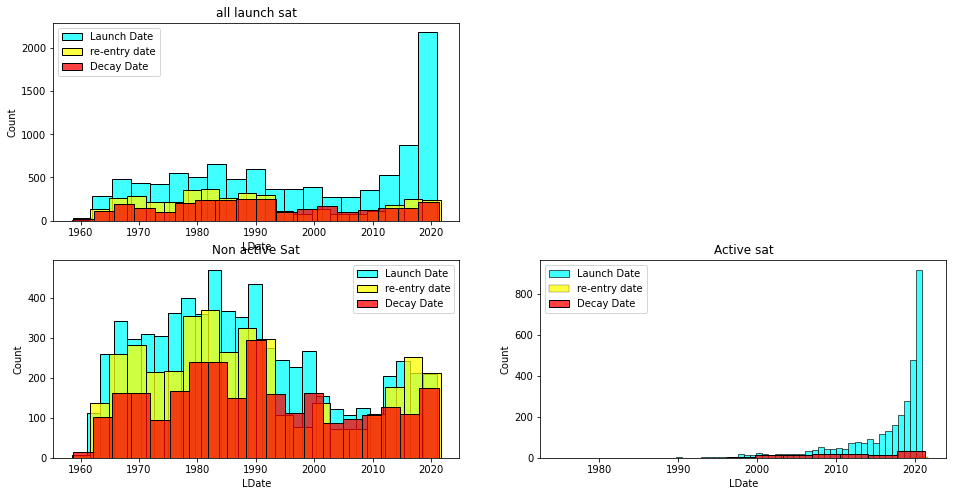

In [114]:
fig, ax = plt.subplots (figsize  = (16, 8))

ax1 = plt.subplot(221)
sns.histplot(data=df4, x='LDate', color='cyan', label='Launch Date')
sns.histplot(data=df4, x='re-entry epoch', color='yellow', label="re-entry date")
sns.histplot(data=df4, x='DDate', color='red', label='Decay Date')
plt.title('all launch sat')
plt.legend()

ax1 = plt.subplot(223)
sns.histplot(data=df5, x='LDate', color='cyan', label='Launch Date')
sns.histplot(data=df5, x='re-entry epoch', color='yellow', label="re-entry date")
sns.histplot(data=df5, x='DDate', color='red', label='Decay Date')
plt.title('Non active Sat')
plt.legend()

ax1 = plt.subplot(224)
sns.histplot(data=df6, x='LDate', color='cyan', label='Launch Date')
sns.histplot(data=df6, x='re-entry epoch', color='yellow', label="re-entry date")
sns.histplot(data=df6, x='DDate', color='red', label='Decay Date')
plt.title('Active sat')
plt.legend()

plt.show()

## Owner

Récupération des satellites avec une date de réentry

In [215]:
df7 = df4.copy()

In [216]:
df7.tail()

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry,Days
18050,Xinjishu Yanzheng 7,2020-12-22,NaT,CAST,CN,CAST,XYZ,9.0,504,515,97.44,LLEO/S,2020-102C,Payload,5000.0,Box + 2 Pan + 1 Dish,3.0,5.0,9.0,NaT,False,NaT,NaT,NaN
18051,Yuanguang,2020-12-22,NaT,HBUT,CN,CTYK,Cubesat 12U,1.0,500,508,97.44,LLEO/S,2020-102D,Payload,20.0,Box + 2 Pan,0.5,1.0,3.0,NaT,False,NaT,NaT,NaN
18052,ET-SMART-RSS,2020-12-22,NaT,ESSTI,ET,ZHIX,Cubesat 6U,0.3,503,513,97.43,LLEO/S,2020-102E,Payload,10.0,Box,0.2,0.3,0.3,NaT,False,NaT,NaT,NaN
18055,Yaogan Weixing 33,2020-12-27,NaT,ZZB,CN,SAST,JB-9,5.0,681,685,98.26,LEO/S,2020-103A,Payload,1040.0,Box + 2 Pan,1.5,1.5,5.0,NaT,False,NaT,NaT,NaN
18056,Weina Jishu Shiyan Weixing,2020-12-27,NaT,CASC,CN,CAST,-,0.3,681,683,98.26,LEO/S,2020-103B,Payload,10.0,Box,0.1,0.3,0.3,NaT,True,NaT,NaT,NaN


In [217]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         10071 non-null  object         
 9   Apogee          10071 non-null  object         
 10  Inc             10071 non-null  object         
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

coding owner

In [218]:
df7['OwnerF']=df7['Owner'].factorize()[0]

In [ ]:
df7

Coding pays (state)

In [219]:
df7['StateF']=df7['State'].factorize()[0]

In [ ]:
df7.head(15)

Coding Manufacturer

In [220]:
df7['ManufacturerF']=df7['Manufacturer'].factorize()[0]

Coding Bus OpOrbit Shape

In [221]:
df7['BusF']=df7['Bus'].factorize()[0]

In [222]:
df7['OpOrbitF']=df7['OpOrbit'].factorize()[0]

In [223]:
df7['shapeF']=df7['shape'].factorize()[0]

In [224]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         10071 non-null  object         
 9   Apogee          10071 non-null  object         
 10  Inc             10071 non-null  object         
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

In [225]:
df7.iloc[:, [7, 8, 9, 10]] = df7.iloc[:, [7, 8, 9, 10]].apply(pd.to_numeric, errors='coerce')

In [226]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         9913 non-null   float64        
 9   Apogee          9919 non-null   float64        
 10  Inc             9958 non-null   float64        
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

In [227]:
df8 = df7.drop(columns=["DDate", "Owner", "State", "Manufacturer", "Bus", "OpOrbit", "cospar id", "object class",
                        "shape", "LifeSpan", "Reentry"])

In [229]:
df8.drop(columns=['re-entry epoch'], inplace=True)

In [230]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           10071 non-null  object        
 1   LDate          10071 non-null  datetime64[ns]
 2   Span           10071 non-null  float64       
 3   Perigee        9913 non-null   float64       
 4   Apogee         9919 non-null   float64       
 5   Inc            9958 non-null   float64       
 6   mass(kg)       10059 non-null  float64       
 7   length(m)      10076 non-null  float64       
 8   height(m)      10076 non-null  float64       
 9   depth(m)       10076 non-null  float64       
 10  Unused         10076 non-null  bool          
 11  Days           2872 non-null   float64       
 12  OwnerF         10076 non-null  int64         
 13  StateF         10076 non-null  int64         
 14  ManufacturerF  10076 non-null  int64         
 15  BusF           1007

#ML

But : prédiction de la réentry date

## sélection des satellites avec une re-entry date

In [231]:
df9 = df8[~df8['Days'].isna()]

In [232]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872 entries, 0 to 17998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2872 non-null   object        
 1   LDate          2872 non-null   datetime64[ns]
 2   Span           2872 non-null   float64       
 3   Perigee        2846 non-null   float64       
 4   Apogee         2854 non-null   float64       
 5   Inc            2862 non-null   float64       
 6   mass(kg)       2867 non-null   float64       
 7   length(m)      2872 non-null   float64       
 8   height(m)      2872 non-null   float64       
 9   depth(m)       2872 non-null   float64       
 10  Unused         2872 non-null   bool          
 11  Days           2872 non-null   float64       
 12  OwnerF         2872 non-null   int64         
 13  StateF         2872 non-null   int64         
 14  ManufacturerF  2872 non-null   int64         
 15  BusF           2872 

In [233]:
#la colonne apogée va être dropée : on ne peut pas travailler avec des valeurs infinies
df9.drop(columns=['Apogee'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


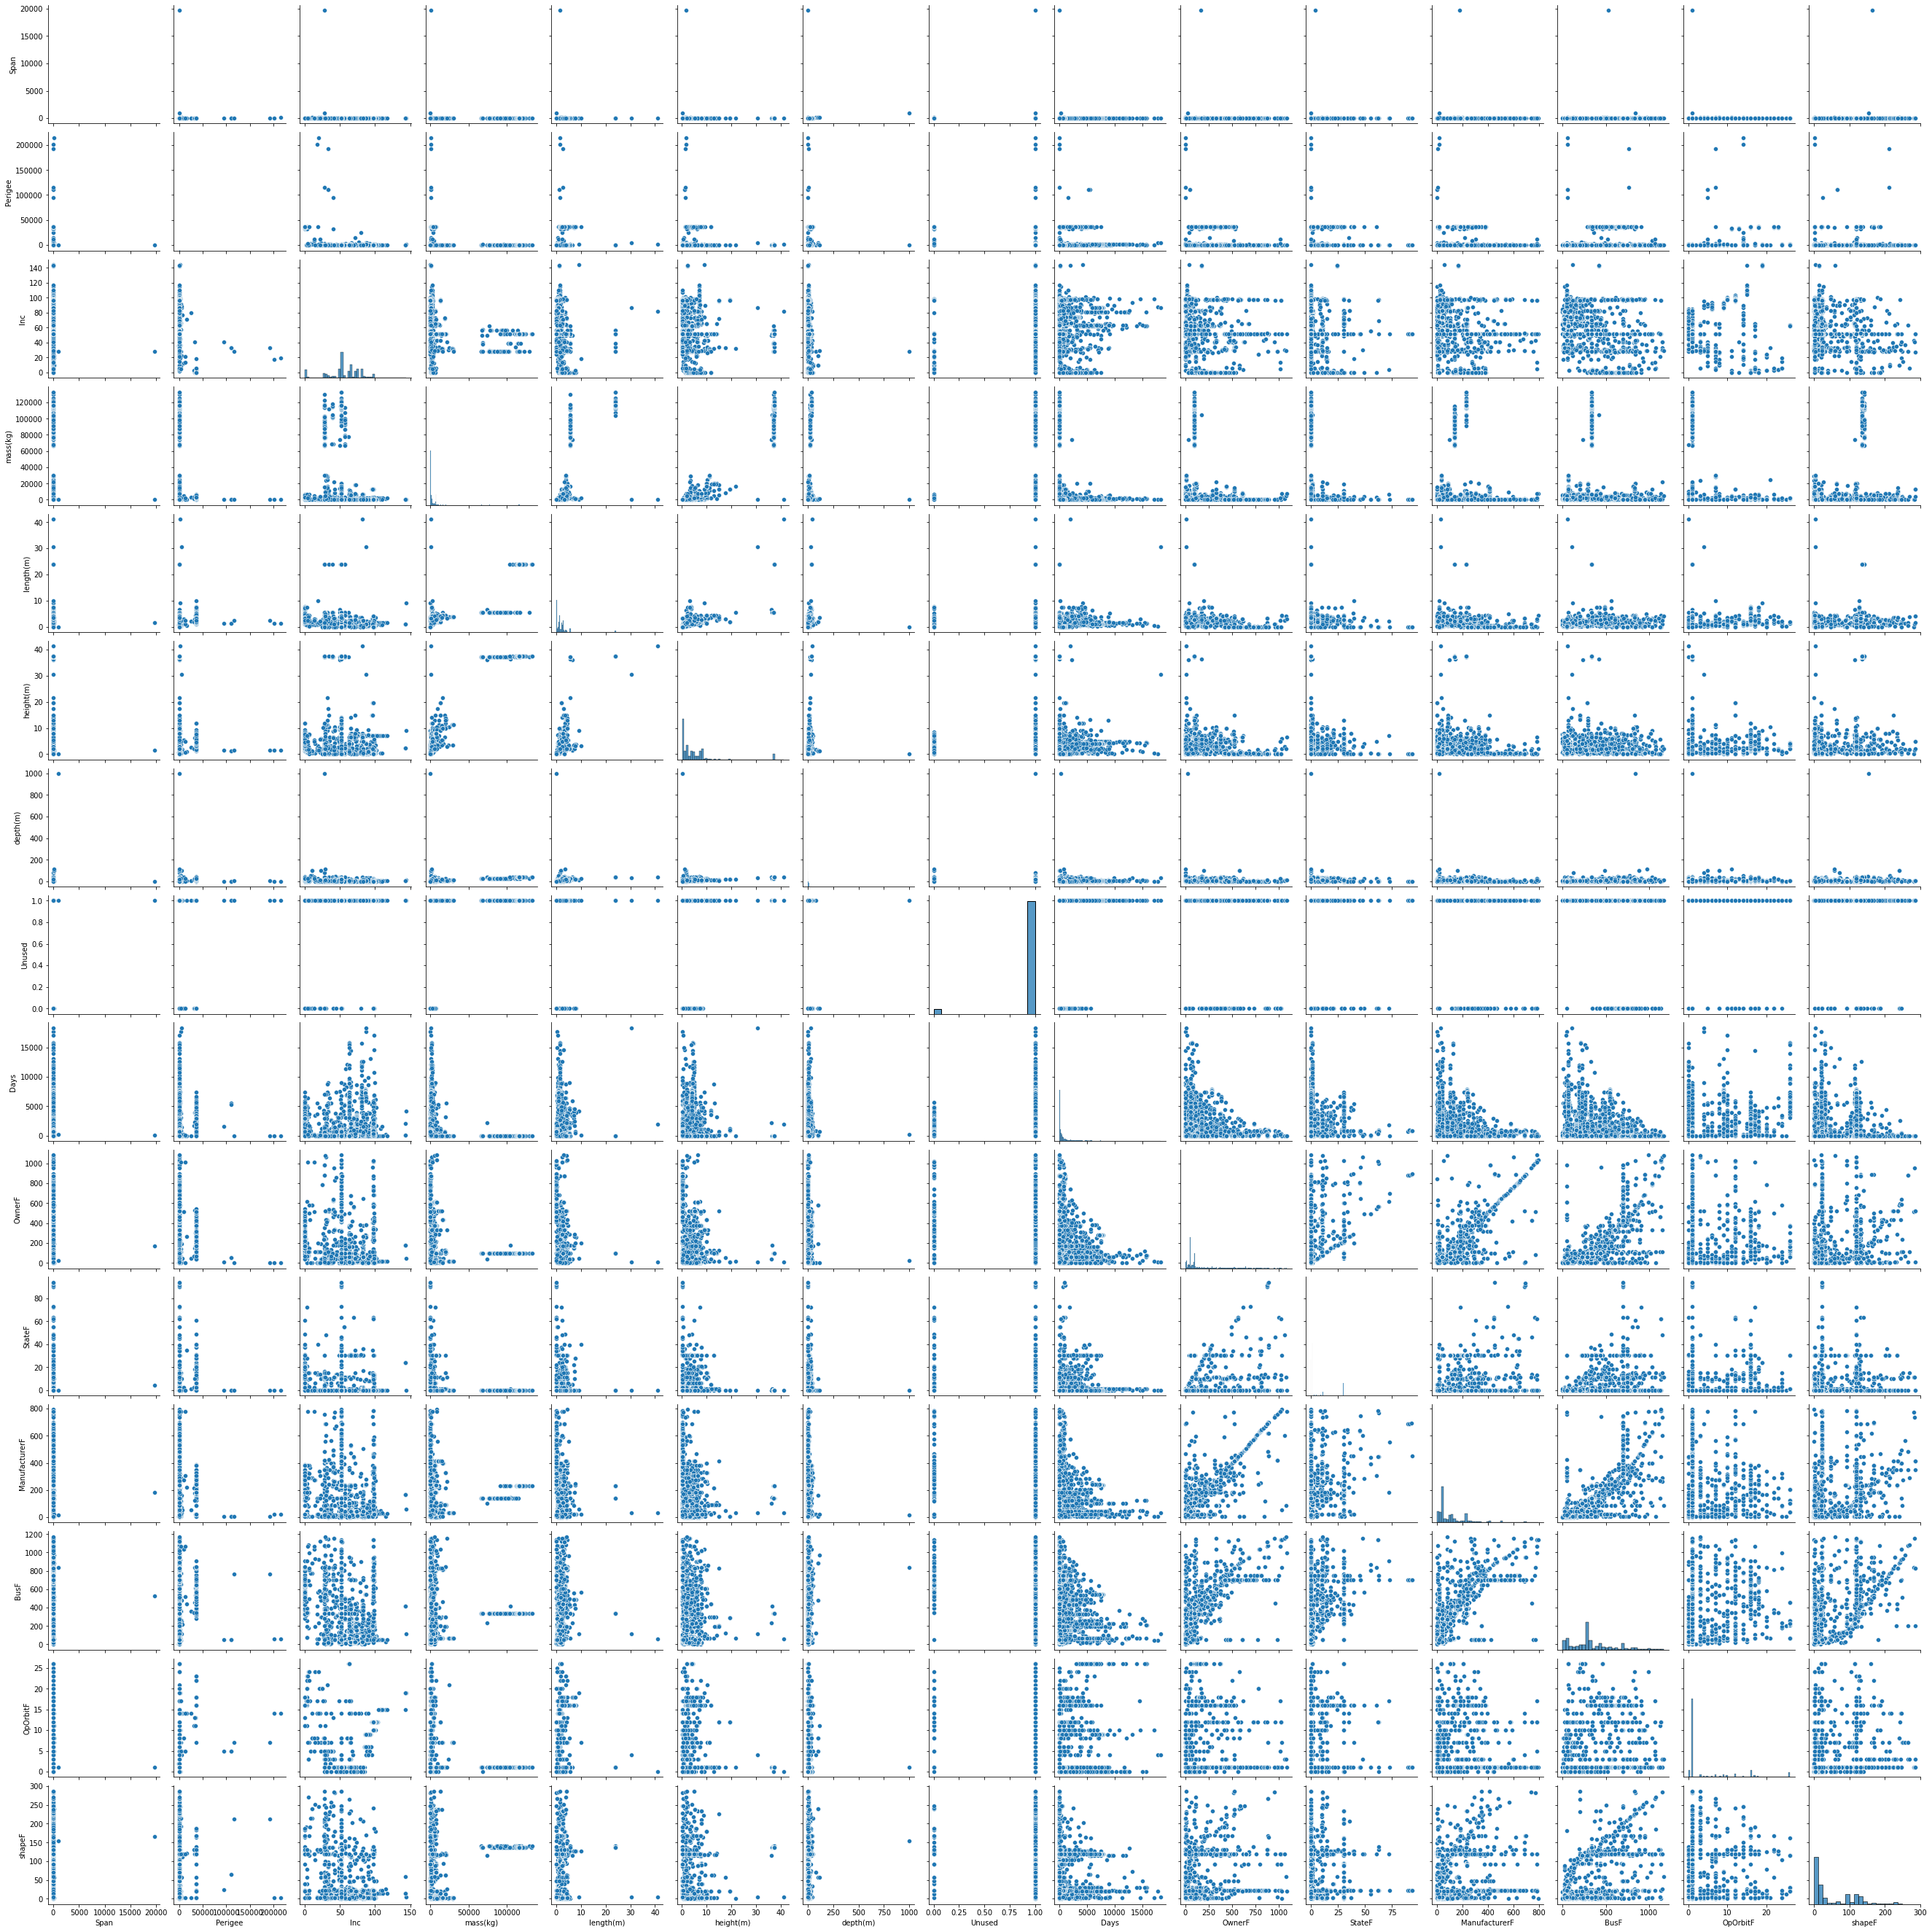

In [234]:
sns.pairplot(df9)
plt.show()

In [235]:
df9['Unused'].value_counts()

True     2758
False     114
Name: Unused, dtype: int64

## Preparation train test et scale

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [237]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2872 non-null   object        
 1   LDate          2872 non-null   datetime64[ns]
 2   Span           2872 non-null   float64       
 3   Perigee        2846 non-null   float64       
 4   Inc            2862 non-null   float64       
 5   mass(kg)       2867 non-null   float64       
 6   length(m)      2872 non-null   float64       
 7   height(m)      2872 non-null   float64       
 8   depth(m)       2872 non-null   float64       
 9   Unused         2872 non-null   bool          
 10  Days           2872 non-null   float64       
 11  OwnerF         2872 non-null   int64         
 12  StateF         2872 non-null   int64         
 13  ManufacturerF  2872 non-null   int64         
 14  BusF           2872 non-null   int64         
 15  OpOrbitF       2872 

In [252]:
df9.describe()

,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF
count,2872.000000,2846.000000,2862.000000,2867.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,14.979526,3309.656711,56.048843,6878.384919,2.018420,4.860481,7.124878,1138.127329,143.779944,5.702994,129.840529,344.579387,4.449513,53.107591
std,367.991686,11892.666166,23.640993,21369.139248,3.269486,7.956266,20.782625,2177.800389,189.218165,11.062025,145.871788,250.752950,6.772377,61.354296
min,0.000000,-870.000000,0.000000,0.016000,0.001000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,257.000000,50.660000,5.000000,0.200000,0.300000,0.300000,8.000000,59.000000,0.000000,44.000000,170.000000,1.000000,4.000000
50%,4.000000,374.000000,51.825000,782.950000,1.500000,2.100000,4.000000,222.000000,67.000000,1.000000,57.000000,282.000000,1.000000,20.000000
75%,8.650000,481.000000,73.527500,4100.000000,2.500000,6.500000,8.100000,1015.250000,120.000000,1.000000,178.250000,439.000000,4.000000,93.000000
max,19695.000000,215092.000000,144.220000,132931.000000,41.140000,41.140000,1000.000000,18333.000000,1084.000000,94.000000,794.000000,1172.000000,26.000000,287.000000


In [253]:
df9.isna().sum()

Name              0
LDate             0
Span              0
Perigee          26
Inc              10
mass(kg)          5
length(m)         0
height(m)         0
depth(m)          0
Unused            0
Days              0
OwnerF            0
StateF            0
ManufacturerF     0
BusF              0
OpOrbitF          0
shapeF            0
dtype: int64

In [254]:
df9.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [255]:
df9.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]]

,LDate,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF
0,1961-04-08,0.8,202.0,81.94,148.660,0.900,0.600,0.900,0,0,0,0,0,0
1,1961-04-12,6.5,168.0,64.95,4682.850,2.400,4.300,4.300,1,1,1,1,1,1
4,1961-06-16,1.3,223.0,82.11,941.530,1.520,7.610,7.610,0,0,3,3,1,3
5,1958-10-11,1.0,-870.0,35.89,22.990,0.740,0.760,0.760,3,0,4,4,2,0
8,1959-03-03,0.6,-45.0,29.00,6.030,0.230,0.510,0.510,4,0,5,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,2020-10-18,9.0,253.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131
17708,2020-10-18,9.0,313.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131
17879,2020-11-16,4.9,189.0,51.65,13000.000,4.000,4.900,4.900,524,0,412,830,1,15
17887,2019-04-17,0.0,468.0,51.64,0.016,0.098,0.098,0.098,466,0,271,1125,1,4


In [256]:
X = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]].values
y = df9['Days']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=16)

In [297]:
scaler = StandardScaler()
scaler.fit(X_train)

SX_train = scaler.transform(X_train)
SX_test = scaler.transform(X_test)

In [295]:
from sklearn.preprocessing import RobustScaler

In [296]:
scaler = RobustScaler()
scaler.fit(X_train)

RX_train = scaler.transform(X_train)
RX_test = scaler.transform(X_test)

## régression Logistique

In [303]:
LReg = LinearRegression().fit(X_train, y_train)
print('train_score', LReg.score(X_train, y_train))
print('test_score', LReg.score(X_test, y_test))

train_score 0.2792754662765561
test_score -301.3640076240159


In [299]:
SLReg = LinearRegression().fit(SX_train, y_train)

In [302]:
print('train_score', SLReg.score(SX_train, y_train))
print('test_score', SLReg.score(SX_test, y_test))

train_score 0.2792754662765561
test_score -301.36400762402985


In [304]:
RReg = LinearRegression().fit(RX_train, y_train)
print('train_score', LReg.score(RX_train, y_train))
print('test_score', LReg.score(RX_test, y_test))

train_score -0.29215230694947314
test_score -3.3525294169267905


c est pas top.... vraiment pas....

## Ridge pour compenser l overfitting

In [274]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.8, random_state=16)
LReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [284]:
ridge = Ridge(alpha=.3)

In [285]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [286]:
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 8.88380250e+01 -6.90268762e-03  1.94034961e+01 -6.10144818e-02
  1.82457213e+02  7.18420677e+01 -7.05457957e+01  2.14580046e+00
 -1.07595514e+01 -2.09172431e+00 -1.06679078e+00  1.54230529e+02
  3.14105808e-02]


In [287]:
lasso = Lasso(alpha=0.1)

In [288]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [289]:
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 8.88311071e+01 -6.90424523e-03  1.94032594e+01 -6.10108030e-02
  1.82450894e+02  7.18319911e+01 -7.05346296e+01  2.14582659e+00
 -1.07582361e+01 -2.09179218e+00 -1.06682067e+00  1.54229624e+02
  3.14243545e-02]


In [290]:
print("Linear Regression Model Training Score: ", LReg.score(X_train, y_train))
print("Linear Regression Model Testing Score:", LReg.score(X_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(X_train,y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.2792754662765561
Linear Regression Model Testing Score: -301.3640076240159
Ridge Regression Model Training Score:  0.279275465616347
Ridge Regression Model Testing Score:  -301.3031079045
Lasso Regression Model Training Score:  0.27927546470706355
Lasso Regression Model Testing Score:  -301.256159963228


In [275]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,test_size=0.8, random_state=16)
LReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [277]:
print(LReg.coef_[0])

-1.2517815964531936e-07


In [278]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))


Ridge model: [ 0.00000000e+00 -2.06630578e+02  5.69837312e-01  1.37772813e+00
 -2.21731761e-02  3.72398864e+02  1.04019411e+02 -2.50875169e+01
 -6.84545104e+00 -6.11972436e+00  6.41623892e+00  4.39272096e+00
  6.02936625e+01 -1.67103879e+01  3.25343265e-02  7.54930555e+00
  2.28657037e-02 -1.17460118e+02  1.16497517e+01 -3.33159217e+00
 -1.23672212e+00 -4.59996066e-01  2.00541793e-02  5.18470952e-01
 -1.34140509e+01 -2.08809992e+00  4.15396969e-02 -7.42465674e-06
  5.26837488e-02 -3.52679206e-02 -2.53091674e-02  6.87019481e-04
  2.48823083e-03 -3.32069516e-04 -3.81569593e-04 -3.26151453e-02
 -1.13907782e-03 -1.15260730e-03 -2.39314931e+00 -1.51313292e+00
 -3.55461730e+00  2.31234611e-01  5.17199419e-01 -2.14888824e-01
 -1.14614166e-01 -1.52886334e+00  2.29456051e-01  7.76390106e-03
 -2.11105537e-02 -6.86173344e-04 -1.81476716e-03  1.01423358e-02
  1.58033528e-04  6.28062907e-05 -1.22892961e-02  7.38264971e-04
 -6.43979198e+00  1.18970723e+02  8.24812025e-01 -3.24869251e+01
  1.97920105

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.39741e-19): result may not be accurate.
  overwrite_a=True).T


In [281]:
lasso = Lasso(alpha=0.03)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00 -9.94121270e+00  5.50135454e-01  1.12018468e+00
 -7.95124411e-02  6.80443356e+02 -4.72092035e+01 -7.00258853e+01
 -4.28538601e+00 -2.75885860e+00  1.00806214e+01  1.99114105e+00
  6.79332274e+01 -2.47622373e+01  2.44807942e-02  5.06075461e+00
 -3.44094881e-03 -1.29479989e+01  1.84934580e-01 -1.35013259e+00
 -6.49180122e-02 -1.74242104e+00 -6.05046112e-01 -2.50690034e-01
 -1.47995504e+01 -1.92758409e+00  4.15143148e-02  1.21324191e-05
  4.10482258e-02 -3.14476559e-02 -2.22483104e-02  6.01053441e-04
  3.34711962e-03 -6.71032399e-04 -3.78371397e-04 -2.94482265e-02
 -3.15697043e-04 -8.44486499e-04 -3.27741942e+00 -2.88659447e-01
 -2.46929233e+00  2.36847318e-01  5.42008710e-01 -3.00222311e-01
 -7.64606796e-02 -1.63651927e+00  2.50604564e-01  3.61633238e-03
  3.84519219e-03  8.06100965e-04 -1.25621944e-03  7.58644319e-03
  4.64658604e-04  9.24996996e-05 -1.75850214e-02  5.29526726e-04
 -1.43443933e+01  1.84536825e+01  3.33660648e-01 -3.45108884e+01
  7.25362802

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 705156389.2611508, tolerance: 342890.3264481164
  positive)


In [282]:
print("Linear Regression Model Training Score: ", LReg.score(X_train, y_train))
print("Linear Regression Model Testing Score:", LReg.score(X_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(X_train,y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.6066203855582111
Linear Regression Model Testing Score: -8349.334631331185
Ridge Regression Model Training Score:  0.6066201685792225
Ridge Regression Model Testing Score:  -8355.234747495868
Lasso Regression Model Training Score:  0.5887103530005972
Lasso Regression Model Testing Score:  -8876.083572213598


La transfo ridge et lasso améliore le score du train mais c est carnage sur le test set overfitting à mort....

## Decision Tree

In [307]:
from sklearn.tree import DecisionTreeRegressor

In [308]:
DTR = DecisionTreeRegressor()

In [309]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [315]:
df10 = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]]

In [316]:
print(dict(zip(df10.columns, DTR.feature_importances_)))

{'Span': 0.06831366441924752, 'Perigee': 0.48466140557501197, 'Inc': 0.12285763683459935, 'mass(kg)': 0.011502393867405293, 'length(m)': 0.004038266947481784, 'height(m)': 0.005942029508442918, 'depth(m)': 0.03995708333533101, 'OwnerF': 0.014571466767168143, 'StateF': 0.0086084720881756, 'ManufacturerF': 0.07609061450844262, 'BusF': 0.042378430949876075, 'OpOrbitF': 0.1155021920011672, 'shapeF': 0.005576343197650537}


In [319]:
print('train score : ' , DTR.score(X_train, y_train))
print('test score : ' , DTR.score(X_test, y_test))
print('depth : ', DTR.get_depth())

train score :  0.9998739638374778
test score :  0.2625923887991807
depth :  24


In [320]:
DTR2 = DecisionTreeRegressor(max_depth=10)
DTR2.fit(X_train, y_train)
print(dict(zip(df10.columns, DTR2.feature_importances_)))

{'Span': 0.038810148727208435, 'Perigee': 0.4880900011169284, 'Inc': 0.12401363783081872, 'mass(kg)': 0.009433603434653616, 'length(m)': 0.0036686195928698692, 'height(m)': 0.006217273623679537, 'depth(m)': 0.06891059828047529, 'OwnerF': 0.016256949201558225, 'StateF': 0.006541707200482156, 'ManufacturerF': 0.07723288066014232, 'BusF': 0.04482303497616484, 'OpOrbitF': 0.11589998848236678, 'shapeF': 0.00010155687265221036}


In [321]:
print('train score : ' , DTR2.score(X_train, y_train))
print('test score : ' , DTR2.score(X_test, y_test))
print('depth : ', DTR2.get_depth())

train score :  0.98141620981721
test score :  0.2597965267916277
depth :  10


In [323]:
DTR3 = DecisionTreeRegressor(max_depth=5)
DTR3.fit(X_train, y_train)
print(dict(zip(df10.columns, DTR3.feature_importances_)))

{'Span': 0.0009526825579801492, 'Perigee': 0.555926824527532, 'Inc': 0.09607431014209714, 'mass(kg)': 0.0, 'length(m)': 0.0038618006308180444, 'height(m)': 0.0, 'depth(m)': 0.0781143111169006, 'OwnerF': 0.0017062129043050852, 'StateF': 0.005254013595275303, 'ManufacturerF': 0.0914013534229074, 'BusF': 0.049503221234444894, 'OpOrbitF': 0.11720526986773921, 'shapeF': 0.0}


In [324]:
print('train score : ' , DTR3.score(X_train, y_train))
print('test score : ' , DTR3.score(X_test, y_test))
print('depth : ', DTR3.get_depth())

train score :  0.8023043421546909
test score :  0.3160714504126554
depth :  5


In [325]:
DTR3 = DecisionTreeRegressor(max_depth=3)
DTR3.fit(X_train, y_train)
print(dict(zip(df10.columns, DTR3.feature_importances_)))
print('train score : ' , DTR3.score(X_train, y_train))
print('test score : ' , DTR3.score(X_test, y_test))
print('depth : ', DTR3.get_depth())

{'Span': 0.0, 'Perigee': 0.6734211747384964, 'Inc': 0.14705727804025487, 'mass(kg)': 0.0, 'length(m)': 0.0, 'height(m)': 0.0, 'depth(m)': 0.0012823738022765794, 'OwnerF': 0.0026836156710870014, 'StateF': 0.0, 'ManufacturerF': 0.14365242761151734, 'BusF': 0.0, 'OpOrbitF': 0.03190313013636799, 'shapeF': 0.0}
train score :  0.5100961499490719
test score :  0.31523877172746706
depth :  3


## XG_Boost

In [327]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2839 non-null   object        
 1   LDate          2839 non-null   datetime64[ns]
 2   Span           2839 non-null   float64       
 3   Perigee        2839 non-null   float64       
 4   Inc            2839 non-null   float64       
 5   mass(kg)       2839 non-null   float64       
 6   length(m)      2839 non-null   float64       
 7   height(m)      2839 non-null   float64       
 8   depth(m)       2839 non-null   float64       
 9   Unused         2839 non-null   bool          
 10  Days           2839 non-null   float64       
 11  OwnerF         2839 non-null   int64         
 12  StateF         2839 non-null   int64         
 13  ManufacturerF  2839 non-null   int64         
 14  BusF           2839 non-null   int64         
 15  OpOrbitF       2839 

In [344]:
X = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]].values
y = df9['Days']

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=16)
scaler = StandardScaler()
scaler.fit(X_train)

SX_train = scaler.transform(X_train)
SX_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb

In [351]:
XGBR = XGBRegressor(
    max_depth=20,
    learning_rate = 1,
    objective='reg:squarederror',
    n_estimators=40,
    silent=False
)
XGBR.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-mae:721.81
[1]	validation_0-mae:730.507
[2]	validation_0-mae:747.647
[3]	validation_0-mae:751.688
[4]	validation_0-mae:753.17
[5]	validation_0-mae:754.462
[6]	validation_0-mae:755.11
[7]	validation_0-mae:755.323
[8]	validation_0-mae:755.584
[9]	validation_0-mae:755.649
[10]	validation_0-mae:755.691
[11]	validation_0-mae:755.699
[12]	validation_0-mae:755.72
[13]	validation_0-mae:755.729
[14]	validation_0-mae:755.729
[15]	validation_0-mae:755.733
[16]	validation_0-mae:755.734
[17]	validation_0-mae:755.734
[18]	validation_0-mae:755.735
[19]	validation_0-mae:755.735
[20]	validation_0-mae:755.735
[21]	validation_0-mae:755.735
[22]	validation_0-mae:755.735
[23]	validation_0-mae:755.735
[24]	validation_0-mae:755.735
[25]	validation_0-mae:755.735
[26]	validation_0-mae:755.735
[27]	validation_0-mae:755.735
[28]	validation_0-mae:755.735
[29]	validation_0-mae:755.735
[30]	validation_0-mae:755.735
[31]	validation_0-mae:755.735
[32]	validation_0-mae:755.735
[33]	validation_0-mae:75

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=1, verbosity=1)

La MAE est énorme.....

In [353]:
from sklearn.metrics import r2_score, mean_absolute_error

In [359]:
print('MAE train', mean_absolute_error(y_train, XGBR.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR.predict(X_test)))

MAE train 2.6233130450590267
MAE test 755.7352197409169


In [356]:
print('R2 train', r2_score(y_train, XGBR.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR.predict(X_test)))

R2 train 0.9998739638373426
R2 test 0.27769925760868075


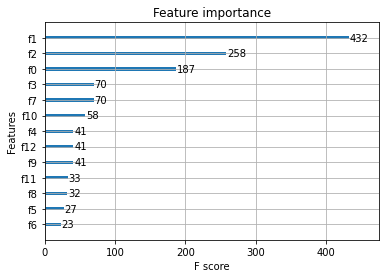

In [348]:
xgb.plot_importance(XGBR)

In [357]:
XGBR2 = XGBRegressor(
    max_depth=5,
    learning_rate = 0.5,
    objective='reg:squarederror',
    n_estimators=40,
    silent=False
)
XGBR2.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-mae:778.549
[1]	validation_0-mae:685.068
[2]	validation_0-mae:670.136
[3]	validation_0-mae:666.415
[4]	validation_0-mae:676.518
[5]	validation_0-mae:680.412
[6]	validation_0-mae:687.249
[7]	validation_0-mae:692.204
[8]	validation_0-mae:691.194
[9]	validation_0-mae:695.852
[10]	validation_0-mae:694.554
[11]	validation_0-mae:694.388
[12]	validation_0-mae:694.349
[13]	validation_0-mae:694.995
[14]	validation_0-mae:693.628
[15]	validation_0-mae:695.435
[16]	validation_0-mae:695.112
[17]	validation_0-mae:695.106
[18]	validation_0-mae:696.41
[19]	validation_0-mae:698.105
[20]	validation_0-mae:699.11
[21]	validation_0-mae:696.658
[22]	validation_0-mae:696.186
[23]	validation_0-mae:694.337
[24]	validation_0-mae:694.645
[25]	validation_0-mae:694.076
[26]	validation_0-mae:695.018
[27]	validation_0-mae:694.946
[28]	validation_0-mae:693.897
[29]	validation_0-mae:694.908
[30]	validation_0-mae:695.018
[31]	validation_0-mae:694.652
[32]	validation_0-mae:695.146
[33]	validation_0-mae:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=1, verbosity=1)

In [361]:
print('MAE train', mean_absolute_error(y_train, XGBR2.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR2.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR2.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR2.predict(X_test)))


MAE train 69.01392642324308
MAE test 696.0830581454604
R2 train 0.9979869191274886
R2 test 0.45202672771294905


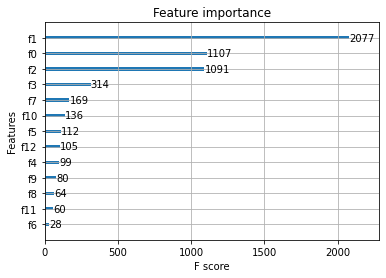

In [362]:
xgb.plot_importance(XGBR)

Le R2 est un peu mieux mais la MAE est haute presque 2 ans...

In [363]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2839 non-null   object        
 1   LDate          2839 non-null   datetime64[ns]
 2   Span           2839 non-null   float64       
 3   Perigee        2839 non-null   float64       
 4   Inc            2839 non-null   float64       
 5   mass(kg)       2839 non-null   float64       
 6   length(m)      2839 non-null   float64       
 7   height(m)      2839 non-null   float64       
 8   depth(m)       2839 non-null   float64       
 9   Unused         2839 non-null   bool          
 10  Days           2839 non-null   float64       
 11  OwnerF         2839 non-null   int64         
 12  StateF         2839 non-null   int64         
 13  ManufacturerF  2839 non-null   int64         
 14  BusF           2839 non-null   int64         
 15  OpOrbitF       2839 

In [383]:
X = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]].values
y = df9['Days']

#X = df9.iloc[:,[2, 3, 4, 5, 11,7,13, 15, 16]].values
#y = df9['Days']

In [397]:
XGBR3 = XGBRegressor(
    max_depth=5,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    silent=False
)
XGBR3.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-mae:1043.86
[1]	validation_0-mae:969.953
[2]	validation_0-mae:908.685
[3]	validation_0-mae:856.599
[4]	validation_0-mae:812.962
[5]	validation_0-mae:776.188
[6]	validation_0-mae:747.198
[7]	validation_0-mae:723.034
[8]	validation_0-mae:701.727
[9]	validation_0-mae:688.597
[10]	validation_0-mae:677.062
[11]	validation_0-mae:670.711
[12]	validation_0-mae:664.45
[13]	validation_0-mae:661.781
[14]	validation_0-mae:661.199
[15]	validation_0-mae:658.042
[16]	validation_0-mae:655.034
[17]	validation_0-mae:653.572
[18]	validation_0-mae:650.501
[19]	validation_0-mae:649.093
[20]	validation_0-mae:648.663
[21]	validation_0-mae:649.125
[22]	validation_0-mae:649.996
[23]	validation_0-mae:650.115
[24]	validation_0-mae:650.638
[25]	validation_0-mae:651.64
[26]	validation_0-mae:653.444
[27]	validation_0-mae:654.915
[28]	validation_0-mae:654.956
[29]	validation_0-mae:656.587
[30]	validation_0-mae:657.231
[31]	validation_0-mae:657.132
[32]	validation_0-mae:658.699
[33]	validation_0-mae:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=1, verbosity=1)

In [398]:
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(X_test)))

MAE train 158.98958191110086
MAE test 666.4280645387407
R2 train 0.9895779201480922
R2 test 0.5011624377913275


In [399]:
XGBR3 = XGBRegressor(
    max_depth=3,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    silent=False
)
XGBR3.fit(X_train, y_train)
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(X_test)))

MAE train 383.3818462563944
MAE test 687.8908664632362
R2 train 0.9235677510241418
R2 test 0.5343121073027852


In [430]:
XGBR3 = XGBRegressor(
    max_depth=6,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBR3.fit(X_train, y_train)
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(X_test)))

MAE train 577.0017116008962
MAE test 730.8322327386372
R2 train 0.7410103764612914
R2 test 0.56064619352442
